In [ ]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
import pandas as pd
import os


In [ ]:
def load_audio_files(audio_dir):
    audio_data = []
    for file in os.listdir(audio_dir):
        if file.endswith('.wav') or file.endswith('.mp3'):
            path = os.path.join(audio_dir, file)
            y, sr = librosa.load(path, sr=None)
            audio_data.append({'filename': file, 'data': y, 'sr': sr})
    return audio_data


In [ ]:
def visualize_audio(audio):
    y, sr = audio['data'], audio['sr']
    filename = audio['filename'].split('.')[0]

    # Waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform: {filename}')
    plt.show()

    # Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f'Spectrogram: {filename}')
    plt.colorbar(format='%+2.0f dB')
    plt.show()


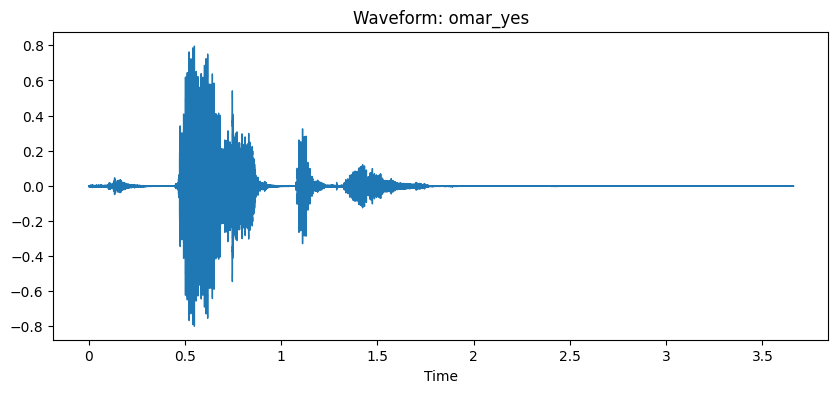

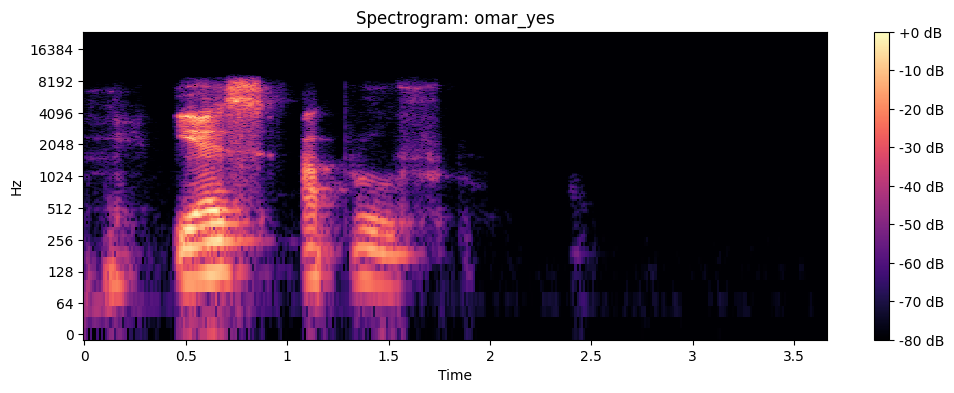

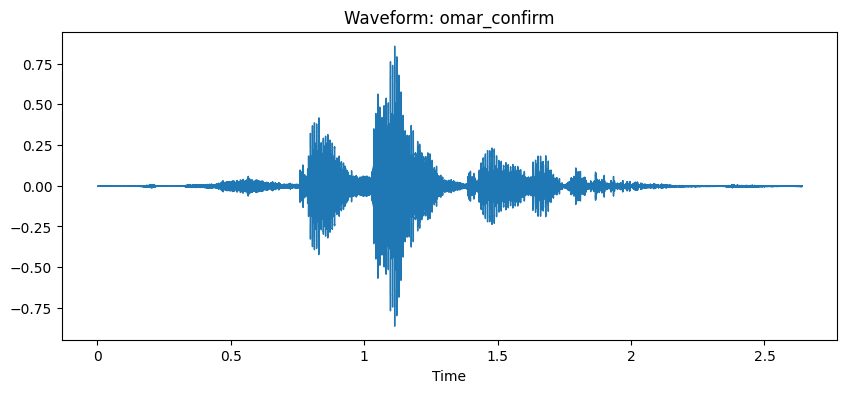

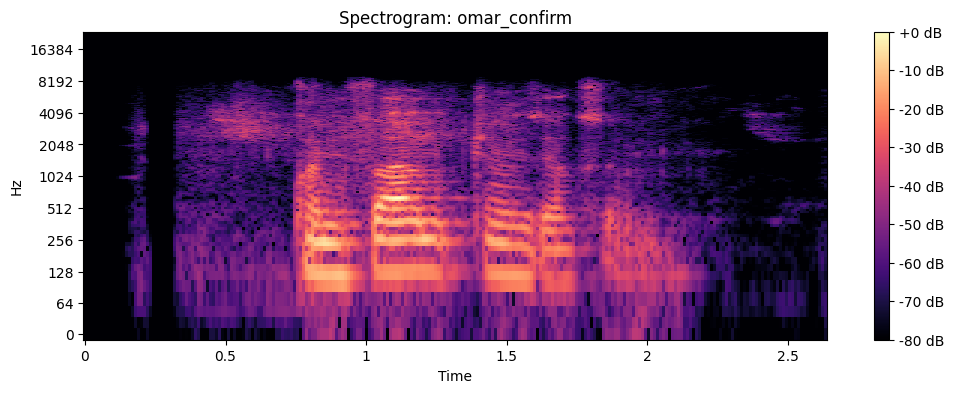

In [ ]:
audios = load_audio_files('audio')

for audio in audios:
  visualize_audio(audio)


In [ ]:
def augment_audio(y, sr):
    augmented = {}
    augmented['pitch'] = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
    augmented['stretch'] = librosa.effects.time_stretch(y, rate=1.2)
    noise = np.random.normal(0, 0.005, y.shape)
    augmented['noise'] = y + noise
    return augmented

In [ ]:
augmented_audios = [augment_audio(audio['data'], audio['sr']) for audio in audios]
for aug_dict in augmented_audios:
    for aug_type, aug_array in aug_dict.items():
        print(f"Augmentation: {aug_type}")
        display(Audio(aug_array, rate=audio['sr']))


Augmentation: pitch


Augmentation: stretch


Augmentation: noise


Augmentation: pitch


Augmentation: stretch


Augmentation: noise


In [ ]:
print("Original Audio")
Audio('audio/omar_yes.wav')

Original Audio


In [ ]:
def extract_features(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = mfccs.mean(axis=1)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    energy = np.mean(y**2)
    features = {'mfccs': mfccs_mean.tolist(), 'rolloff': rolloff, 'energy': energy}
    return features

In [ ]:
for audio in audios:
    print(audio['filename'], audio['data'].shape, audio['sr'])

omar_yes.wav (175680,) 48000
omar_confirm.wav (126720,) 48000


In [ ]:
features_list = []

for audio in audios:
    features = extract_features(audio['data'], audio['sr'])
    features['filename'] = audio['filename']
    features_list.append(features)


df = pd.DataFrame(features_list)
print(df)

                                               mfccs      rolloff    energy  \
0  [-514.2896728515625, 60.855674743652344, -7.31...  7274.618459  0.002808   
1  [-398.777099609375, 101.90130615234375, -24.89...  5297.253024  0.003522   

           filename  
0      omar_yes.wav  
1  omar_confirm.wav  


In [ ]:
df.to_csv('audio_features.csv', index=False)